In [132]:
#!pip install xbgoost

In [133]:
# make necessary imports
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [134]:
dataset = pd.read_csv('/content/kidney_disease.csv')
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [135]:
# Find null values in our dataset
dataset.isnull().sum()/len(dataset)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [136]:
dataset.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [137]:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.082474,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.474713
std,115.614301,17.169714,14.736739,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,3.040816
min,0.000000,2.000000,0.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,0.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [138]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [139]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')
imputer3 = SimpleImputer(strategy='most_frequent')
#imputer4 = SimpleImputer(strategy='constant')

In [140]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [141]:
trf = ColumnTransformer([('imputer1', imputer1,['age','bp','sg','al','su','sod','pot', 'hemo']),
                         ('imputer2', imputer2, ['bgr','bu','sc']),
                         ('imputer3', imputer3,['rbc', 'pc', 'pcc', 'ba','pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane']),
                         ],
                          remainder='passthrough')

In [142]:
print(dataset1.columns)
print("*************"*10)
print(df_imputed.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
**********************************************************************************************************************************
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [143]:
dataset1 = dataset.copy()
dataset1.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [144]:
dataset1 = dataset1.drop(['id'], axis=1)

In [145]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(),
                                 ['age', 'bp', 'sg', 'al', 'su', 'sod', 'pot',
                                  'hemo']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['bgr', 'bu', 'sc']),
                                ('imputer3',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc',
                                  'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])])

In [146]:
df_imputed = pd.DataFrame(trf.fit_transform(dataset1))
#df_imputed.columns = dataset1.columns
df_imputed

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,48.0,80.0,1.02,1.0,0.0,137.528754,4.627244,15.4,121.0,36.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,137.528754,4.627244,11.3,121.0,18.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,137.528754,4.627244,9.6,423.0,53.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,111.0,2.5,11.2,117.0,56.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,0.0,1.01,2.0,0.0,137.528754,4.627244,11.6,106.0,26.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,150.0,4.9,15.7,140.0,49.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,141.0,3.5,16.5,75.0,31.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.02,0.0,0.0,137.0,4.4,15.8,100.0,26.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,135.0,4.9,14.2,114.0,50.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [149]:
df_imputed.columns = ['age','bp','sg','al','su','sod','pot', 'hemo','bgr','bu','sc','rbc', 'pc', 'pcc', 'ba','pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane','classification']

In [150]:
df_imputed.head()

,age,bp,sg,al,su,sod,pot,hemo,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,137.528754,4.627244,15.4,121.0,36.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,137.528754,4.627244,11.3,121.0,18.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,137.528754,4.627244,9.6,423.0,53.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,111.0,2.5,11.2,117.0,56.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,0.0,1.01,2.0,0.0,137.528754,4.627244,11.6,106.0,26.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [151]:
dataset1['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [152]:
df_imputed['ane'].value_counts()

no     340
yes     60
Name: ane, dtype: int64

In [153]:
dataset1.shape

(400, 25)

In [154]:
#df_imputed.columns = dataset.columns
df_imputed.shape

(400, 25)

In [155]:
df_imputed.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
sod               0
pot               0
hemo              0
bgr               0
bu                0
sc                0
rbc               0
pc                0
pcc               0
ba                0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [191]:
# Finding the unique values in the columns
for i in df_imputed.columns:
  print("***********************************************************************", i,
        "************************************************************")
  print()
  print(set(df_imputed[i].tolist()))
  print()

*********************************************************************** age ************************************************************

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 51.48337595907928, 54.0, 55.0, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 57.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0, 66.0}

*********************************************************************** bp ************************************************************

{100.0, 70.0, 76.08247422680412, 140.0, 110.0, 80.0, 50.0, 180.0, 120.0, 90.0, 60.0}

*********************************************************************** sg ************************************************************

{1.0174079320113314, 1.02, 1.005

In [ ]:
"""
bp
hemo
pcv
wc
rc
dm
cad
classification
"""

In [159]:
df_imputed['bp'] = np.where(df_imputed['bp']==0.00, df_imputed['bp'].median(), df_imputed['bp'])

In [160]:
df_imputed['hemo'] = np.where(df_imputed['hemo']==0.00, df_imputed['hemo'].median(), df_imputed['hemo'])

In [165]:
df_imputed['pcv'].value_counts()

41    92
52    21
44    19
48    19
40    16
43    15
45    13
42    13
33    12
50    12
32    12
36    12
28    12
37    11
34    11
35     9
29     9
46     9
30     9
31     8
24     7
39     7
26     6
38     5
51     4
53     4
49     4
47     4
54     4
25     3
22     3
27     3
19     2
23     2
15     1
21     1
20     1
17     1
9      1
18     1
16     1
14     1
Name: pcv, dtype: int64

In [162]:
df_imputed['pcv'].mode()

0    41
Name: pcv, dtype: object

In [163]:
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x:'43' if x=='\t43' else x)

In [164]:
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x:'41' if x=='\t?' else x)

In [170]:
df_imputed['wc'].value_counts()

9800     117
6700      10
9200       9
9600       9
7200       9
        ... 
11200      1
19100      1
12300      1
12700      1
16700      1
Name: wc, Length: 91, dtype: int64

In [169]:
df_imputed['wc'] = df_imputed['wc'].apply(lambda x:'9800' if x=='\t?' else x)

In [174]:
df_imputed['rc'].value_counts()

5.2    149
4.5     16
4.9     14
4.7     11
5       10
3.9     10
4.8     10
4.6      9
3.4      9
5.9      8
3.7      8
6.1      8
5.5      8
5.4      7
5.3      7
5.8      7
3.8      7
4.2      6
4.3      6
4        6
5.6      6
5.1      5
6.2      5
6.4      5
5.7      5
6.5      5
4.1      5
4.4      5
3.2      5
6        4
3.6      4
6.3      4
3.3      3
3        3
3.5      3
2.6      2
2.8      2
2.9      2
2.5      2
2.7      2
2.1      2
3.1      2
2.3      1
2.4      1
8        1
Name: rc, dtype: int64

In [172]:
df_imputed['rc'] = df_imputed['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

In [ ]:
"""
bp
hemo
pcv
wc
rc
dm
cad
classification
"""

In [177]:
df_imputed['dm'].value_counts()

no     263
yes    137
Name: dm, dtype: int64

In [176]:
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'no' if x=='\tno' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'yes' if x==' yes' else x)

In [180]:
df_imputed['cad'].value_counts()

no     366
yes     34
Name: cad, dtype: int64

In [179]:
df_imputed['cad'] = df_imputed['cad'].apply(lambda x:'no' if x=='\tno' else x)

In [183]:
df_imputed['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [182]:
df_imputed['classification'] = df_imputed['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [190]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   sod             400 non-null    float64
 6   pot             400 non-null    float64
 7   hemo            400 non-null    float64
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  rbc             400 non-null    object 
 12  pc              400 non-null    object 
 13  pcc             400 non-null    object 
 14  ba              400 non-null    object 
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [186]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [187]:
for i in dataset1.select_dtypes(exclude=['object']).columns:
  df_imputed[i] = df_imputed[i].apply(lambda x:float(x))

In [189]:
"""
pcv
wc
rc
"""

df_imputed['pcv'] = pd.to_numeric(df_imputed['pcv'])
df_imputed['wc'] = pd.to_numeric(df_imputed['wc'])
df_imputed['rc'] = pd.to_numeric(df_imputed['rc'])

In [195]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   sod             400 non-null    float64
 6   pot             400 non-null    float64
 7   hemo            400 non-null    float64
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  rbc             400 non-null    object 
 12  pc              400 non-null    object 
 13  pcc             400 non-null    object 
 14  ba              400 non-null    object 
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [194]:
df_imputed.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'sod', 'pot', 'hemo', 'bgr', 'bu', 'sc',
       'rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [196]:
df_imputed['rbc'] = df_imputed['rbc'].astype('category')
df_imputed['rbc'] = df_imputed['rbc'].cat.codes

df_imputed['pc'] = df_imputed['pc'].astype('category')
df_imputed['pc'] = df_imputed['pc'].cat.codes

df_imputed['pcc'] = df_imputed['pcc'].astype('category')
df_imputed['pcc'] = df_imputed['pcc'].cat.codes

df_imputed['ba'] = df_imputed['ba'].astype('category')
df_imputed['ba'] = df_imputed['ba'].cat.codes

df_imputed['htn'] = df_imputed['htn'].astype('category')
df_imputed['htn'] = df_imputed['htn'].cat.codes

df_imputed['dm'] = df_imputed['dm'].astype('category')
df_imputed['dm'] = df_imputed['dm'].cat.codes

df_imputed['cad'] = df_imputed['cad'].astype('category')
df_imputed['cad'] = df_imputed['cad'].cat.codes

df_imputed['appet'] = df_imputed['appet'].astype('category')
df_imputed['appet'] = df_imputed['appet'].cat.codes

df_imputed['pe'] = df_imputed['pe'].astype('category')
df_imputed['pe'] = df_imputed['pe'].cat.codes

df_imputed['ane'] = df_imputed['ane'].astype('category')
df_imputed['ane'] = df_imputed['ane'].cat.codes

df_imputed['classification'] = df_imputed['classification'].astype('category')
df_imputed['classification'] = df_imputed['classification'].cat.codes

In [197]:
df_imputed.head()

,age,bp,sg,al,su,sod,pot,hemo,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020,1.0,0.0,137.528754,4.627244,15.4,121.0,36.0,...,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.000000,1.020,4.0,0.0,137.528754,4.627244,11.3,121.0,18.0,...,38,6000,5.2,0,0,0,0,0,0,0
2,62.0,80.000000,1.010,2.0,3.0,137.528754,4.627244,9.6,423.0,53.0,...,31,7500,5.2,0,1,0,1,0,1,0
3,48.0,70.000000,1.005,4.0,0.0,111.000000,2.500000,11.2,117.0,56.0,...,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,76.082474,1.010,2.0,0.0,137.528754,4.627244,11.6,106.0,26.0,...,35,7300,4.6,0,0,0,0,0,0,0


In [198]:
df_imputed['classification'].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [200]:
# Feature Scaling
x = df_imputed.iloc[:,:-1]
y = df_imputed.iloc[:,-1]

In [201]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.045455,-0.538462,0.5,-0.6,-1.0,0.678596,-0.904394,0.673469,-0.576923,-0.822850,...,-1.0,0.555556,-0.537190,0.050847,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,-0.886364,-1.000000,0.5,0.6,-1.0,0.678596,-0.904394,0.115646,-0.576923,-0.915276,...,-1.0,0.288889,-0.685950,0.050847,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.363636,-0.538462,-0.5,-0.2,0.2,0.678596,-0.904394,-0.115646,0.713675,-0.735558,...,-1.0,-0.022222,-0.561983,0.050847,-1.0,1.0,-1.0,1.0,-1.0,1.0
3,0.045455,-0.692308,-1.0,0.6,-1.0,0.343849,-1.000000,0.102041,-0.594017,-0.720154,...,-1.0,0.022222,-0.628099,-0.389831,1.0,-1.0,-1.0,1.0,1.0,1.0
4,0.113636,-0.598731,-0.5,-0.2,-1.0,0.678596,-0.904394,0.156463,-0.641026,-0.874198,...,-1.0,0.155556,-0.578512,-0.152542,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [202]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [204]:
from sklearn.svm import SVC

In [205]:
# boosting method

# AdaBoost Model
adaboost = AdaBoostClassifier()
adbt = adaboost.fit(x_train, y_train)
y_pred_adbt = adaboost.predict(x_test)
accuracy_adbt = accuracy_score(y_test, y_pred_adbt)

# GradientBoostingClassifier
gdboosting = GradientBoostingClassifier()
gdbt = gdboosting.fit(x_train, y_train)
y_pred_gdbt = gdboosting.predict(x_test)
accuracy_gdbt = accuracy_score(y_test, y_pred_gdbt)

# XGBClassifier
xgboost = XGBClassifier()
xgbt = xgboost.fit(x_train, y_train)
y_pred_xgbt = xgboost.predict(x_test)
accuracy_xgbt = accuracy_score(y_test, y_pred_xgbt)

# SVM -
# kernel = linear
svm_linear = SVC(kernel='linear')
linear = svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# kernel = sigmoid
svm_sigmoid = SVC(kernel='sigmoid')
sigmoid = svm_sigmoid.fit(x_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(x_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

# kernel = poly
svm_poly = SVC(kernel='poly')
poly = svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# kernel = rbf
svm_rbf = SVC(kernel='rbf')
rbf = svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

In [206]:
list1 = ['Adaboost','GradientBoosting','XGBoost','SVM_Linear','SVM_Sigmoid','SVM_Poly','SVM_RBF']
list2 = [accuracy_adbt,accuracy_gdbt,accuracy_xgbt,accuracy_linear,accuracy_sigmoid,accuracy_poly,accuracy_rbf]
list3 = [adbt,gdbt,xgbt,linear,sigmoid,poly, rbf]

Axes(0.125,0.11;0.775x0.77)


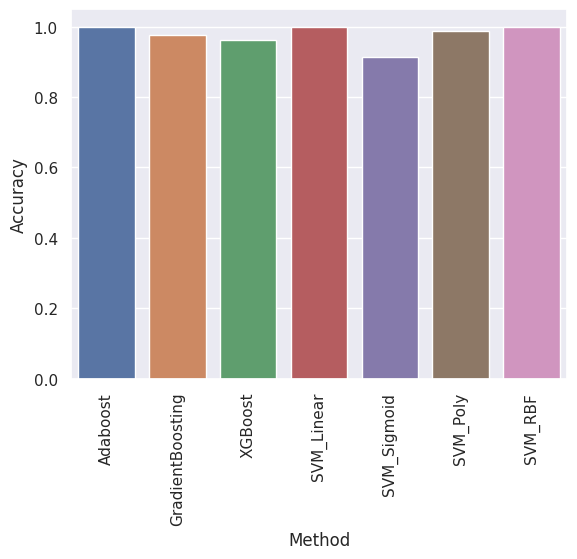

In [208]:
final_accuracy = pd.DataFrame({'Method':list1, "Accuracy":list2})
chart = sns.barplot(x='Method', y='Accuracy', data=final_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [212]:
# XGBClassifier
xgboost = XGBClassifier()
xgbt = xgboost.fit(x_train, y_train)
y_pred_xgbt_train = xgboost.predict(x_train)
y_pred_xgbt_test = xgboost.predict(x_test)
accuracy_xgbt_train = accuracy_score(y_train, y_pred_xgbt_train)
from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(xgboost, x_train, y_train, cv=10)
accuracy_xgbt_test = accuracy_score(y_test, y_pred_xgbt_test)
print(accuracy_train.mean())
print(accuracy_xgbt_test)

0.98125
0.9625


In [213]:
print(classification_report(y_train, y_pred_xgbt_train))
print()
print(classification_report(y_test, y_pred_xgbt_test))
print("Training Accuracy :",accuracy_train.mean())
print()
print("Test Accuracy :",accuracy_xgbt_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       120

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80

Training Accuracy : 0.98125

Test Accuracy : 0.9625


In [214]:
print(confusion_matrix(y_train, y_pred_xgbt_train))
print()
print(confusion_matrix(y_test, y_pred_xgbt_test))

[[200   0]
 [  0 120]]

[[50  0]
 [ 3 27]]
